In [1]:
import numpy as np
import scipy.stats as st
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import json

Set font size for figures

In [2]:
FS = 40

Import dictionaries containing numbers of connected components per terminal arbor for p7

In [3]:
# p7f0 = 'data/190306_new_dxdz_const_p7_n_segs_from_ftas_ssize_1_1_n_iter_100.json' # 100 iterations
p7f0 = 'data/190307_new_dxdz_const_p7_n_segs_from_ftas_ssize_1_1_n_iter_500.json' # 500 iterations

In [4]:
with open(p7f0,'r') as f:
    p7d0 = json.loads(f.read())

Inspect branch dictionary

In [5]:
print(p7d0.keys())
print(p7d0['sample_size'])
print(p7d0['cf_id_lists'])
print(p7d0['conn_comp_dists'])

dict_keys(['sample_size', 'cf_id_lists', 'conn_comp_dists'])
[1]
[[[22], [63], [22], [11], [7], [55], [54], [54], [61], [61], [54], [24], [24], [12], [63], [11], [61], [61], [61], [7], [55], [54], [7], [7], [55], [54], [22], [54], [24], [61], [63], [55], [63], [55], [63], [54], [63], [55], [63], [11], [7], [24], [12], [11], [61], [11], [12], [11], [55], [54], [24], [22], [63], [55], [63], [11], [61], [63], [7], [24], [12], [54], [12], [54], [7], [61], [12], [55], [54], [54], [11], [61], [12], [7], [24], [63], [7], [24], [55], [22], [11], [61], [12], [54], [11], [55], [61], [54], [7], [22], [11], [54], [22], [63], [11], [54], [54], [11], [24], [63], [24], [7], [7], [24], [61], [24], [63], [24], [63], [24], [63], [54], [22], [7], [7], [24], [22], [7], [7], [54], [24], [12], [12], [12], [12], [11], [61], [11], [22], [55], [63], [12], [24], [7], [7], [61], [7], [55], [11], [54], [54], [24], [24], [54], [55], [24], [61], [54], [12], [22], [12], [22], [55], [61], [63], [54], [11], [24], [61]

In [6]:
# print(len(p7d0['conn_comp_dists'][0])) # Consistency checking

Import dictionary with baseline values of connected components per terminal arbor

In [7]:
# p7b = 'data/190306_new_dxdz_const_p7_baseline_n_ccs.json' # 100 iterations
p7b = 'data/190307_new_dxdz_const_p7_baseline_n_ccs.json' # 500 iterations

In [8]:
with open(p7b,'r') as f:
    p7bd = json.loads(f.read())

Inspect baseline dictionary

In [9]:
print(p7bd.keys())
print(p7bd['seg_id'])
print(p7bd['n_ccs_bl'])

dict_keys(['seg_id', 'n_ccs_bl'])
[7, 11, 12, 22, 24, 54, 55, 61, 63]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


Plot the distribution of number of connected components as a function of the augmented sample size

In [10]:
ccs = p7d0['conn_comp_dists'][0]
ccs = [q[0] for q in ccs if q[0] !=0]
# print(ccs) # Debugging

mean = 1.8303571428571428 
median = 1.0 
standard deviation = 1.3734627306370493


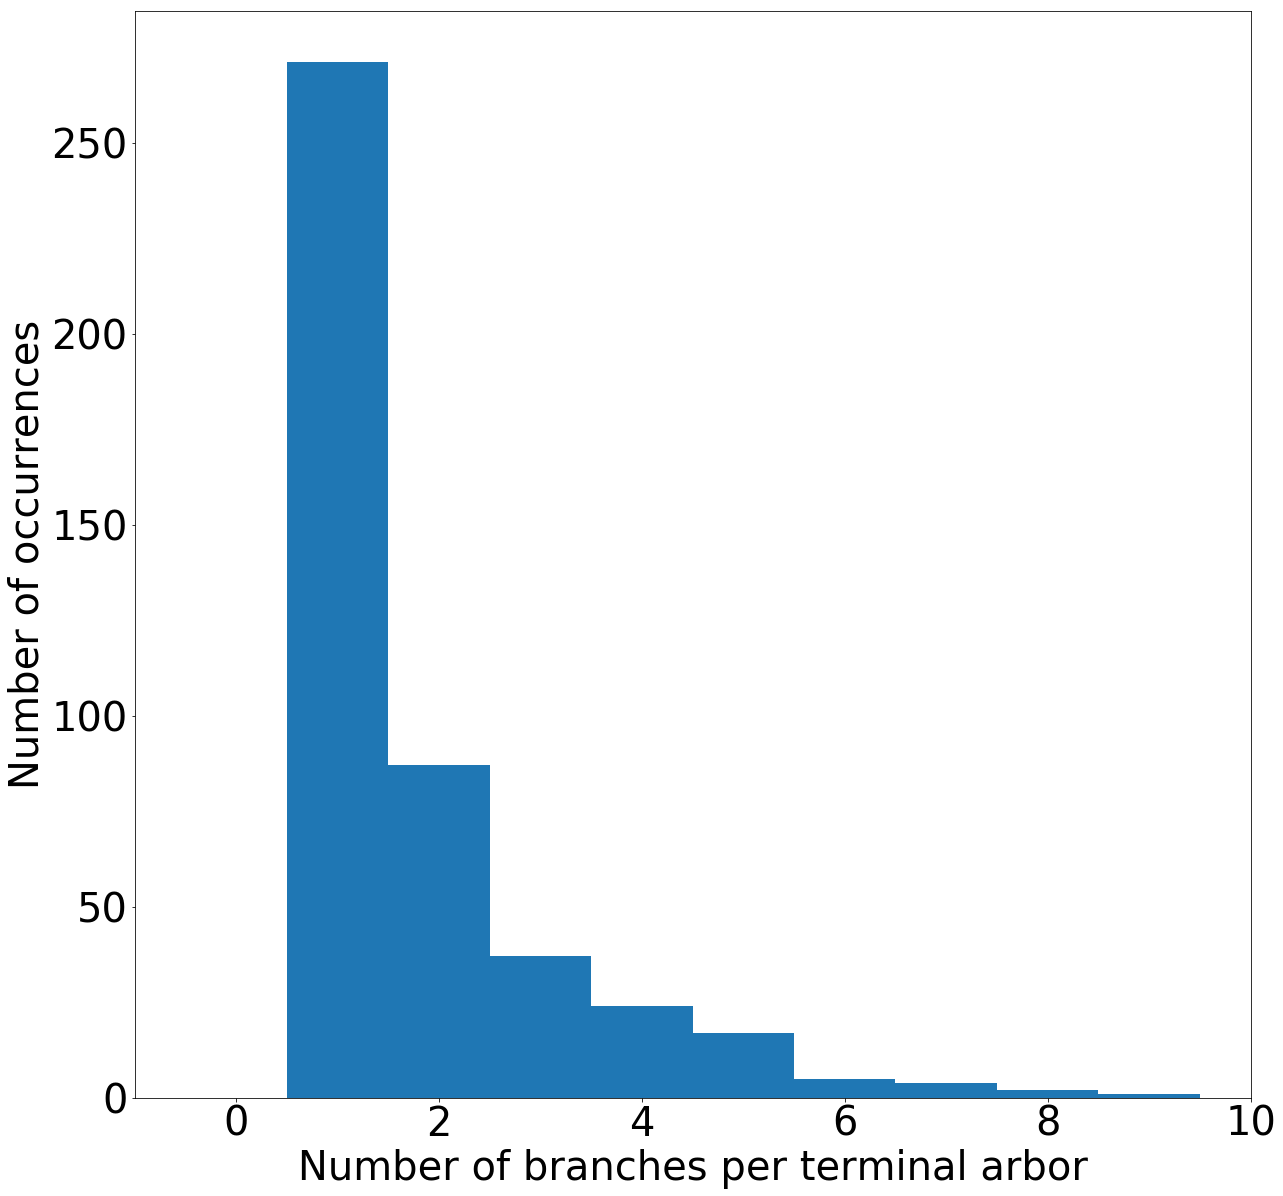

In [13]:
binedges = np.arange(-5,105,10)*0.1
plt.figure(figsize=(20,20))
plt.hist(ccs,bins=binedges)
plt.xlabel('Number of branches per terminal arbor',fontsize=FS)
plt.ylabel('Number of occurrences',fontsize=FS)
plt.tick_params(labelsize=FS)
fname = 'data/figures/est_n_cf_axons/190307_p7_n_branches_per_fta_ssize_{0}_niter_{1}.png'.format(p7d0['sample_size'][0],len(p7d0['conn_comp_dists']))
# plt.show()
plt.savefig(fname)
print('mean = {0} \nmedian = {1} \nstandard deviation = {2}'.format(np.mean(ccs),np.median(ccs),np.std(ccs)))